In [54]:
import geopandas as gpd
import pandas as pd
from base import ROOT_DIR
from IPython.display import display
import matplotlib.pyplot as plt
import contextily as ctx
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")

In [55]:
eaglebine_folder = ROOT_DIR / "gtx/data/Eaglebine/Eaglebine"
egb_well_head = pd.read_excel(eaglebine_folder / "Eaglebine well headers SPE "
                                                 "April 21 2021.xlsx")
egb_well_tops = pd.read_excel(eaglebine_folder / "Eaglebine formation tops SPE April 20 "
                                                 "2021.xlsx")
egb_prod = pd.read_excel(eaglebine_folder / "SPE Eaglebine production summary April 20 "
                                            "2021.xlsx")
egb_well_head.head()

,td,Elevation,ElevationDatum,displayapi,WGS84Latitude,WGS84Longitude,SurfLat,SurfLong,SurfaceLatitude_NAD83,SurfaceLongitude_NAD83,BottomLatitude_NAD83,BottomLongitude_NAD83,SurfaceLatitude_NAD27,SurfaceLongitude_NAD27,BottomLatitude_NAD27,BottomLongitude_NAD27
0,19635,338.68,KB,42013301410000,NaN,NaN,NaN,NaN,28.690101,-98.469817,28.690101,-98.469817,28.689839,-98.469523,28.689839,-98.469523
1,10775,384.59,KB,42013301930000,NaN,NaN,NaN,NaN,28.780042,-98.208395,28.780042,-98.208396,28.779784,-98.208109,28.779784,-98.208109
2,6175,442.00,KB,42013302760000,NaN,NaN,NaN,NaN,28.994810,-98.422767,28.994810,-98.422767,28.994561,-98.422475,28.994561,-98.422475
3,8198,392.00,KB,42013305480000,NaN,NaN,NaN,NaN,28.963395,-98.295961,28.963395,-98.295961,28.963144,-98.295673,28.963144,-98.295672
4,11000,493.23,KB,42013310190000,NaN,NaN,NaN,NaN,28.817939,-98.155472,28.817939,-98.155472,28.817682,-98.155187,28.817682,-98.155187


## Load X, Y locations into geopandas

In [56]:
lat_nad83_col = "SurfaceLatitude_NAD83"
lon_nad83_col = "SurfaceLongitude_NAD83"
lat_wgs84_col = "WGS84Latitude"
lon_wgs84_col = "WGS84Longitude"
# Useful cols to rename
td_col = "td"
kb_col = "elevation"
uwi_col = "UWI"
# Useful cols
useful_cols = [td_col, "Elevation", "displayapi"]

wh_nad83 = egb_well_head.dropna(subset=[lat_nad83_col, lon_nad83_col])
wh_wgs84 = egb_well_head.dropna(subset=[lat_wgs84_col, lon_wgs84_col])

geometry_nad83 = gpd.points_from_xy(wh_nad83[lon_nad83_col], wh_nad83[lat_nad83_col])
wh_nad83.drop([lat_nad83_col, lon_nad83_col], axis=1, inplace=True)
geometry_wgs84 = gpd.points_from_xy(wh_wgs84[lon_wgs84_col], wh_wgs84[lat_wgs84_col])
wh_wgs84.drop([lat_wgs84_col, lon_wgs84_col], axis=1, inplace=True)

gdf_wh_1 = gpd.GeoDataFrame(wh_nad83[useful_cols],
                            crs="epsg:4269",
                            geometry=geometry_nad83)
print(gdf_wh_1.info())
gdf_wh_2 = gpd.GeoDataFrame(wh_wgs84[useful_cols],
                            crs="epsg:4326",
                            geometry=geometry_wgs84)
print(gdf_wh_2.info())
# Convert epsg 4326 to 4269
gdf_wh = gdf_wh_1.append(gdf_wh_2.to_crs(epsg=4269))
print(gdf_wh.info())
gdf_wh.rename(columns={"Elevation": kb_col, "displayapi": uwi_col}, inplace=True)
display(gdf_wh.head())

C:\Users\oscar\miniconda3\envs\gtx-2021\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 308 entries, 0 to 323
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   td          308 non-null    int64   
 1   Elevation   308 non-null    float64 
 2   displayapi  308 non-null    int64   
 3   geometry    308 non-null    geometry
dtypes: float64(1), geometry(1), int64(2)
memory usage: 12.0 KB
None
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 16 entries, 18 to 315
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   td          16 non-null     int64   
 1   Elevation   16 non-null     float64 
 2   displayapi  16 non-null     int64   
 3   geometry    16 non-null     geometry
dtypes: float64(1), geometry(1), int64(2)
memory usage: 640.0 bytes
None
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 324 entries, 0 to 315
Data columns (total 4 columns):
 #   Column      N

,td,elevation,UWI,geometry
0,19635,338.68,42013301410000,POINT (-98.46982 28.69010)
1,10775,384.59,42013301930000,POINT (-98.20840 28.78004)
2,6175,442.00,42013302760000,POINT (-98.42277 28.99481)
3,8198,392.00,42013305480000,POINT (-98.29596 28.96339)
4,11000,493.23,42013310190000,POINT (-98.15547 28.81794)


## Prove conversion from epsg:4326 yields the same as epsg:4269

In [57]:
display(gdf_wh_2.head())
display(gdf_wh_2.to_crs(epsg=4269).head())

,td,Elevation,displayapi,geometry
18,6926,322.00,42021301990000,POINT (-97.12788 30.01103)
82,9710,324.24,42051310330000,POINT (-96.60802 30.38004)
137,8426,624.24,42127316180000,POINT (-99.84831 28.36001)
146,7585,613.52,42127323000000,POINT (-99.82337 28.45475)
155,7500,311.00,42149308070000,POINT (-97.11549 29.96347)


,td,Elevation,displayapi,geometry
18,6926,322.00,42021301990000,POINT (-97.12788 30.01103)
82,9710,324.24,42051310330000,POINT (-96.60802 30.38004)
137,8426,624.24,42127316180000,POINT (-99.84831 28.36001)
146,7585,613.52,42127323000000,POINT (-99.82337 28.45475)
155,7500,311.00,42149308070000,POINT (-97.11549 29.96347)


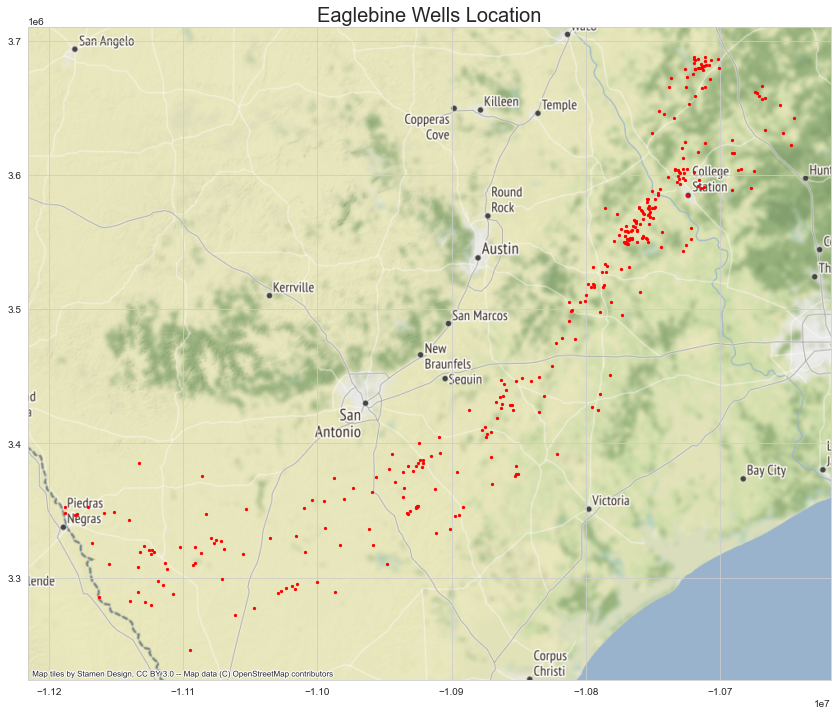

In [58]:
ax_1 = gdf_wh.to_crs(epsg=3857).plot(figsize=(15, 12), markersize=5, color="red")
ctx.add_basemap(ax_1)
plt.title("Eaglebine Wells Location", fontsize=20)
plt.show()

## Merge with production data

### Strip whitespaces from column names

In [59]:
egb_prod.columns = list(map(lambda x: x.strip(), egb_prod.columns))

In [60]:
uwi_prod_col = "API"
oil_cum = "Oil Total Cum (bbl)"
water_cum = "Water Total Cum (bbl)"
gas_cum = "Gas Total Cum (mcf)"
plug_date = "Plug Date"
spud_date = "Spud Date"
completion_date = "Completion Date"
last_production_date = "Last Production Month"
# Calculate liquid production
liq_cum = "Liquid Cum"
useful_prod_cols = [uwi_prod_col, oil_cum, water_cum, gas_cum, liq_cum,
                    plug_date, spud_date, completion_date,
                    last_production_date]
egb_prod[liq_cum] = egb_prod[oil_cum] + egb_prod[water_cum]
egb_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   API                         422 non-null    int64         
 1   Measured Depth (ft)         6 non-null      float64       
 2   Total Vertical Depth (ft)   365 non-null    float64       
 3   Spud Date                   244 non-null    datetime64[ns]
 4   Completion Date             415 non-null    datetime64[ns]
 5   First Production Month      339 non-null    datetime64[ns]
 6   Elevation                   389 non-null    object        
 7   Oil Total Cum (bbl)         339 non-null    float64       
 8   Gas Total Cum (mcf)         339 non-null    float64       
 9   Water Total Cum (bbl)       339 non-null    float64       
 10  GOR Total Average           329 non-null    float64       
 11  Plug Date                   292 non-null    datetime64[ns]

In [61]:
egb_prod[useful_prod_cols].head()

,API,Oil Total Cum (bbl),Water Total Cum (bbl),Gas Total Cum (mcf),Liquid Cum,Plug Date,Spud Date,Completion Date,Last Production Month
0,42013301410000,NaN,NaN,NaN,NaN,1972-02-18,1971-02-14,NaT,NaT
1,42013301930000,6140.000,1002330.677,8702967.000,1008470.677,NaT,NaT,1972-07-22,2020-12-01
2,42013302760000,1929.332,0.000,7.992,1929.332,1987-07-23,NaT,1975-07-28,1981-02-01
3,42013305480000,0.000,0.000,10067.000,0.000,1983-12-15,1977-01-23,1977-02-24,1979-08-01
4,42013310190000,4424.000,47611.388,6610808.000,52035.388,NaT,1980-08-13,1980-10-25,2020-12-01


## Merge with production data

In [62]:
gdf_m_2 = gdf_wh.merge(egb_prod[useful_prod_cols],
                       how="left",
                       left_on=uwi_col,
                       right_on=uwi_prod_col)
gdf_m_2.drop(uwi_prod_col, axis=1, inplace=True)
gdf_m_2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 438 entries, 0 to 437
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   td                     438 non-null    int64         
 1   elevation              438 non-null    float64       
 2   UWI                    438 non-null    int64         
 3   geometry               438 non-null    geometry      
 4   Oil Total Cum (bbl)    339 non-null    float64       
 5   Water Total Cum (bbl)  339 non-null    float64       
 6   Gas Total Cum (mcf)    339 non-null    float64       
 7   Liquid Cum             339 non-null    float64       
 8   Plug Date              292 non-null    datetime64[ns]
 9   Spud Date              244 non-null    datetime64[ns]
 10  Completion Date        415 non-null    datetime64[ns]
 11  Last Production Month  339 non-null    datetime64[ns]
dtypes: datetime64[ns](4), float64(5), geometry(1), int64(2)


## Plot maximum oil and water production data in time

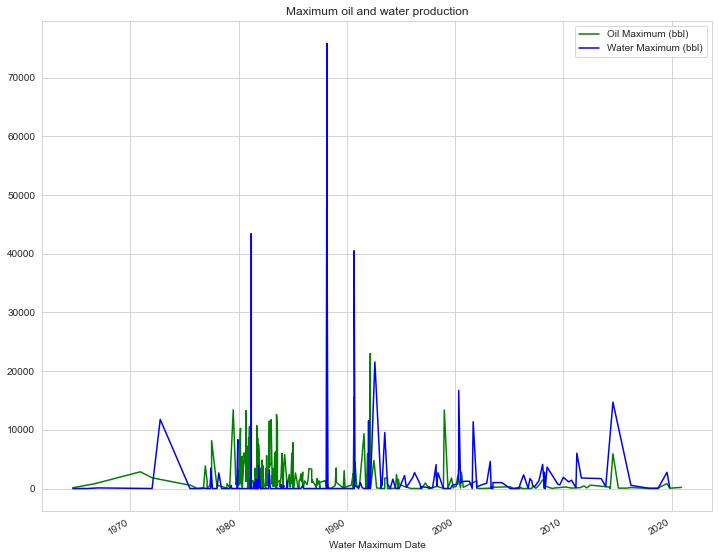

In [63]:
fig, ax_2 = plt.subplots(1, 1, sharex=True, figsize=(12, 10))
egb_prod.plot(ax=ax_2, x="Oil Maximum Date",y="Oil Maximum (bbl)", color="g")
egb_prod.plot(ax=ax_2, x="Water Maximum Date",y="Water Maximum (bbl)", color="b")
plt.title("Maximum oil and water production")
plt.show()

## Save to geopackage

In [64]:
gpkg_file_name = "egb.gpkg"
gpkg_save_path = ROOT_DIR / "gtx/eda_oc" / gpkg_file_name
gdf_m_2.to_file(gpkg_save_path, layer="production", driver='GPKG')



## 2 - Process well tops data

In [89]:
top_md_col = "top_md"
formation_col = "formation"
df_tops: pd.DataFrame = egb_well_tops.set_index(uwi_col).loc[:, "01_Wilcox_MD_ft":]
# Converting from wide format to tidy format
df_tops = df_tops.reset_index().melt(id_vars=uwi_col,
                                     var_name=formation_col,
                                     value_name=top_md_col)
# Extracting the actual formation name
df_tops[formation_col] = df_tops[formation_col].str.extract(r"\d{2}_(.+)_MD_ft")

print(df_tops[formation_col].unique())
display(df_tops.head())
print(df_tops.info())

['Wilcox' 'Midway' 'Navarro' 'Taylor' 'Anacacho' 'Austin_Chalk'
 'Upper_Eagle_Ford' 'Lower_Eagle_Ford' 'Woodbine' 'Maness' 'Buda'
 'Del_Rio' 'Georgetown' 'Edwards' 'Glen_Rose' 'Pearsal' 'James_Cow_Creek'
 'Sligo' 'Cotton_Valley']


,UWI,formation,top_md
0,42013301410000,Wilcox,1464.64
1,42013301930000,Wilcox,0.00
2,42013302760000,Wilcox,0.00
3,42013305480000,Wilcox,0.00
4,42013310190000,Wilcox,0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UWI        6156 non-null   int64  
 1   formation  6156 non-null   object 
 2   top_md     6156 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 144.4+ KB
None


### 2.1 - Replace zero values with nan and eliminate rows

In [90]:
# Replace zero values with nan
df_tops[top_md_col] = df_tops[top_md_col].replace(0, np.nan)
df_tops.dropna(inplace=True)
print(df_tops.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2824 entries, 0 to 6130
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UWI        2824 non-null   int64  
 1   formation  2824 non-null   object 
 2   top_md     2824 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 88.2+ KB
None


### 2.2 - Merge with well header data
To get the elevation, so we can have the SSTVD

In [91]:
top_sstvd_col = "top_sstvd"
df_tops = gpd.GeoDataFrame(df_tops.merge(gdf_wh[[uwi_col, kb_col, "geometry"]],
                                         on=uwi_col))
df_tops[top_sstvd_col] = -(df_tops[top_md_col] - df_tops[kb_col])
df_tops.head()

,UWI,formation,top_md,elevation,geometry,top_sstvd
0,42013301410000,Wilcox,1464.64,338.68,POINT (-98.46982 28.69010),-1125.96
1,42013301410000,Midway,4455.92,338.68,POINT (-98.46982 28.69010),-4117.24
2,42013301410000,Navarro,4927.92,338.68,POINT (-98.46982 28.69010),-4589.24
3,42013301410000,Taylor,7608.13,338.68,POINT (-98.46982 28.69010),-7269.45
4,42013301410000,Anacacho,9164.50,338.68,POINT (-98.46982 28.69010),-8825.82


In [92]:
formations = df_tops[formation_col].unique()
formations

array(['Wilcox', 'Midway', 'Navarro', 'Taylor', 'Anacacho',
       'Austin_Chalk', 'Upper_Eagle_Ford', 'Lower_Eagle_Ford', 'Buda',
       'Del_Rio', 'Georgetown', 'Edwards', 'Glen_Rose', 'Pearsal',
       'James_Cow_Creek', 'Sligo', 'Woodbine', 'Maness', 'Cotton_Valley'],
      dtype=object)

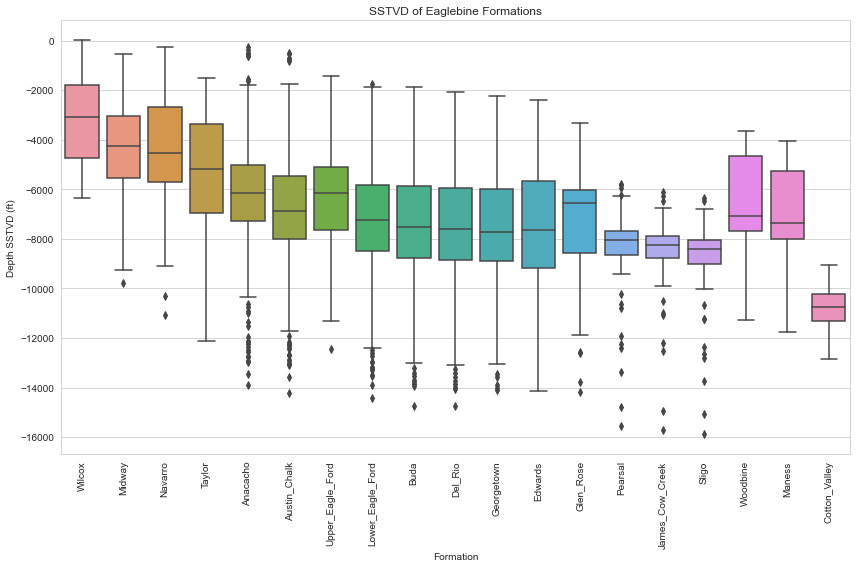

In [93]:
fig_3, ax_3 = plt.subplots(1, 1, figsize=(12, 8))
sns.boxplot(x=formation_col, y=top_sstvd_col, data=df_tops, ax=ax_3, order=formations)
plt.title("SSTVD of Eaglebine Formations")
plt.ylabel("Depth SSTVD (ft)")
plt.xlabel("Formation")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 2.3 - Save Well tops to geopackage

In [95]:
df_tops.to_file(gpkg_save_path, layer="well_tops", driver='GPKG')

## 3 - Process True Temp data with formation tops

### 3.1 - Load the True Temp data

In [70]:
egb_true_temp = pd.read_excel(eaglebine_folder / "Eaglebine TrueTemp_Train2.xlsx")

#Get MD values by merging with well header data
md_col = "MD"
egb_true_temp = egb_true_temp.merge(gdf_wh[[uwi_col, kb_col]], how="left", on=uwi_col)
egb_true_temp[md_col] = egb_true_temp["Depth sub-sea (feet)"] + egb_true_temp[kb_col]
display(egb_true_temp.head())
egb_true_temp.info()

,UWI,Depth sub-sea (feet),True Temperature (oF),elevation,MD
0,42013301410000,-350,70.33,338.68,-11.32
1,42013301410000,-300,70.33,338.68,38.68
2,42013301410000,-250,70.33,338.68,88.68
3,42013301410000,-200,71.49,338.68,138.68
4,42013301410000,-150,72.66,338.68,188.68


<class 'pandas.core.frame.DataFrame'>
Int64Index: 66389 entries, 0 to 66388
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UWI                      66389 non-null  int64  
 1   Depth sub-sea (feet)     66389 non-null  int64  
 2   True Temperature   (oF)  66389 non-null  float64
 3   elevation                66389 non-null  float64
 4   MD                       66389 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 3.0 MB


### 3.2 - Assign formation names to depths

In [71]:
gr_tops = df_tops.groupby(uwi_col)
df_tt = pd.DataFrame()
for name, group in gr_tops:
    well_cond = egb_true_temp[uwi_col] == name
    for row in group.itertuples(index=False):
        md_top = getattr(row, top_md_col)
        formation_name = getattr(row, formation_col)
        formation_cond = egb_true_temp[md_col] >= md_top
        if sum(formation_cond) >= 1:
            egb_true_temp.loc[formation_cond & well_cond, formation_col] = formation_name

egb_true_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66389 entries, 0 to 66388
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UWI                      66389 non-null  int64  
 1   Depth sub-sea (feet)     66389 non-null  int64  
 2   True Temperature   (oF)  66389 non-null  float64
 3   elevation                66389 non-null  float64
 4   MD                       66389 non-null  float64
 5   formation                38837 non-null  object 
dtypes: float64(3), int64(2), object(1)
memory usage: 3.5+ MB


In [72]:
egb_true_temp.columns

Index(['UWI', 'Depth sub-sea (feet)', 'True Temperature   (oF)', 'elevation',
       'MD', 'formation'],
      dtype='object')

### 3.3 - Aggregate depth and temperature per formation and well

In [73]:
depth_sstvd_col = "Depth sub-sea (feet)"
true_temp_col = "True Temperature   (oF)"
df_form_temp = (egb_true_temp
                .groupby([uwi_col, formation_col])[[depth_sstvd_col, true_temp_col]]
                .mean())
df_form_temp.reset_index(inplace=True)
df_form_temp.head(10)

,UWI,formation,Depth sub-sea (feet),True Temperature (oF)
0,42013301410000,Anacacho,8975.0,243.946667
1,42013301410000,Austin_Chalk,9175.0,246.735000
2,42013301410000,Buda,9425.0,250.090000
3,42013301410000,Del_Rio,9500.0,251.190000
4,42013301410000,Edwards,10050.0,257.999412
5,42013301410000,Georgetown,9575.0,251.980000
6,42013301410000,Glen_Rose,11200.0,273.079310
7,42013301410000,James_Cow_Creek,12275.0,288.100000
8,42013301410000,Lower_Eagle_Ford,9325.0,248.480000
9,42013301410000,Midway,4350.0,161.858889


### 3.4 - Merge with well header geodataframe

In [74]:
# Cast to GeoDataFrame
gdf_form_temp = gpd.GeoDataFrame(df_form_temp
                                 .merge(gdf_wh[[uwi_col, "geometry"]],
                                        how="left",
                                        on=uwi_col))
gdf_form_temp.head()
print(gdf_form_temp.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2031 entries, 0 to 2030
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   UWI                      2031 non-null   int64   
 1   formation                2031 non-null   object  
 2   Depth sub-sea (feet)     2031 non-null   float64 
 3   True Temperature   (oF)  2031 non-null   float64 
 4   geometry                 2031 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 95.2+ KB
None


### 3.5 - Save to Geopackage

In [75]:
gdf_form_temp.to_file(gpkg_save_path, layer="tops_temperature", driver='GPKG')

In [76]:
gdf_form_temp[formation_col].unique()


array(['Anacacho', 'Austin_Chalk', 'Buda', 'Del_Rio', 'Edwards',
       'Georgetown', 'Glen_Rose', 'James_Cow_Creek', 'Lower_Eagle_Ford',
       'Midway', 'Navarro', 'Pearsal', 'Sligo', 'Taylor',
       'Upper_Eagle_Ford', 'Wilcox', 'Maness', 'Woodbine',
       'Cotton_Valley'], dtype=object)

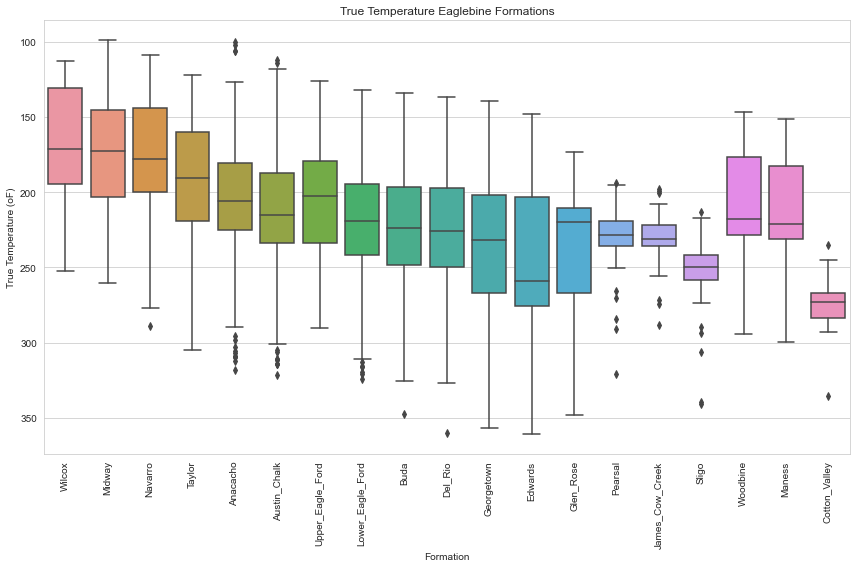

In [77]:
fig_4, ax_4 = plt.subplots(1, 1, figsize=(12, 8))
sns.boxplot(x=formation_col, y=true_temp_col, data=gdf_form_temp, ax=ax_4,
            order=formations)
plt.title("True Temperature Eaglebine Formations")
plt.ylabel("True Temperature (oF)")
plt.xlabel("Formation")
plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

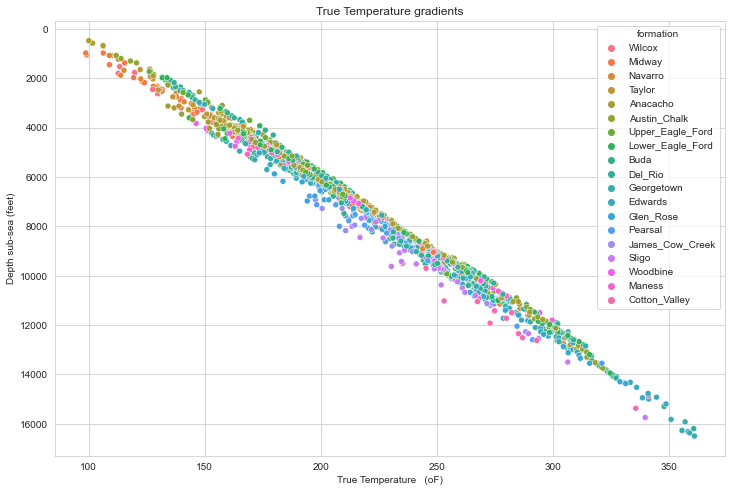

In [78]:
fig_5, ax_5 = plt.subplots(1, 1, figsize=(12, 8))
sns.scatterplot(x=true_temp_col, y=depth_sstvd_col,
                hue=formation_col, data=gdf_form_temp, hue_order=formations, ax=ax_5)
plt.title("True Temperature gradients")
plt.gca().invert_yaxis()
plt.show()


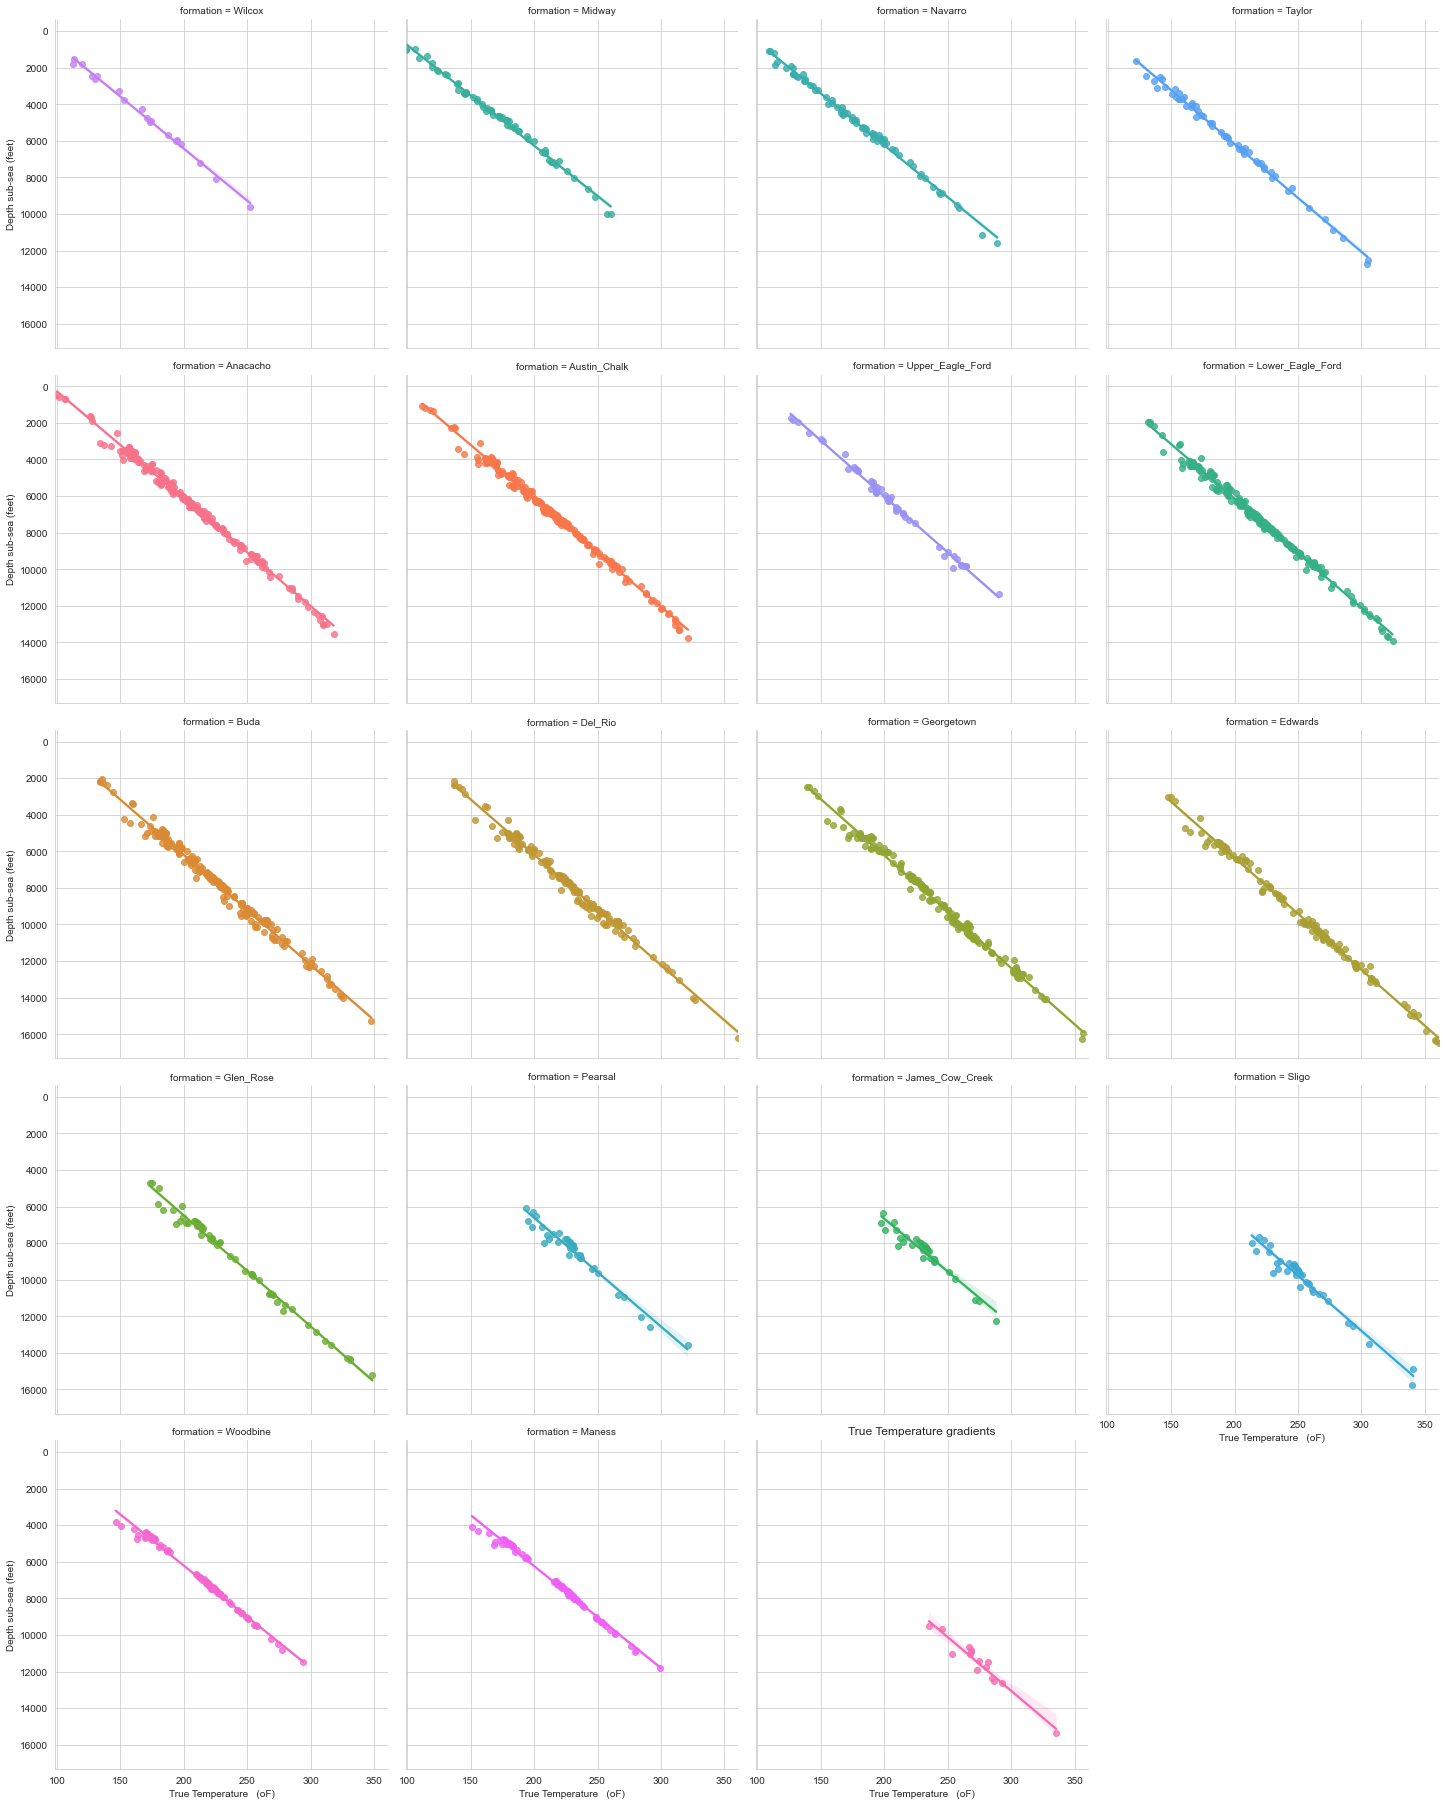

In [79]:
# fig_6, ax_6 = plt.subplots(1, 1, figsize=(12, 8))
g = sns.lmplot(x=true_temp_col, y=depth_sstvd_col, hue=formation_col, data=gdf_form_temp,
           col=formation_col, col_wrap=4, col_order=formations, fit_reg=True)
plt.title("True Temperature gradients")
plt.gca().invert_yaxis()
# plt.savefig("gradients.svg")
plt.show()

In [98]:
print(len(gdf_wh[uwi_col]))
print(len(egb_true_temp[uwi_col].unique()))

324
243
